<a href="https://colab.research.google.com/github/barish-bit/Analyzing_Convection-Soil_Moisture_Regimes_from_Reanalysis_Data/blob/main/Complete_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import netCDF4
import numpy
import xarray

ds = xarray.open_mfdataset('/content/drive/MyDrive/2021_complete_*.nc',combine = 'nested', concat_dim="time")

ds.to_netcdf('Rain_soil_2021_June_July_August_complete.nc')

In [ ]:
pip install netCDF4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 40.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 71.9 MB/s eta 0:00:00


In [ ]:
from netCDF4 import Dataset

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data= Dataset(r"/content/Rain_soil_2021_June_July_complete.nc")
print(data)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.6
    history: 2023-04-11 09:39:54 GMT by grib_to_netcdf-2.25.1: /opt/ecmwf/mars-client/bin/grib_to_netcdf.bin -S param -o /cache/data6/adaptor.mars.internal-1681205966.026342-3375-19-364e9901-a432-418b-b0aa-9ba37c2ea4ac.nc /cache/tmp/364e9901-a432-418b-b0aa-9ba37c2ea4ac-adaptor.mars.internal-1681205351.5325127-3375-27-tmp.grib
    dimensions(sizes): longitude(321), latitude(301), time(1464)
    variables(dimensions): float32 longitude(longitude), float32 latitude(latitude), int32 time(time), int16 src(time, latitude, longitude), int16 tp(time, latitude, longitude), int16 swvl1(time, latitude, longitude), int16 swvl2(time, latitude, longitude), int16 swvl3(time, latitude, longitude), int16 swvl4(time, latitude, longitude)
    groups: 


In [ ]:
#Extracting one longitude-latitude data from the 5 year data set and plotting them
from netCDF4 import Dataset

import numpy as np
data= Dataset(r"/content/Rain_soil_2021_June_July_August_complete.nc")

lons= data.variables["longitude"][:]

lats= data.variables["latitude"][:]

time=data.variables["time"]

time= data.variables["time"][:]

lat_my= float(input("Enter the latitude:"))
lon_my= float(input("Enter the longitude:" ))
sq_diff_lat=(lats-lat_my)**2
sq_diff_lon=(lons-lon_my)**2
min_index_lat=sq_diff_lat.argmin()
min_index_lon=sq_diff_lon.argmin()
longi=lons[min_index_lon]
lati=lats[min_index_lat]
print(min_index_lat,min_index_lon)
print(longi,lati)

Enter the latitude:18.5
Enter the longitude:73.8
195 58
73.8 18.5


In [ ]:
import xarray as xr

ds =xr.open_mfdataset(['/content/Rain_soil_2021_June_July_August_complete.nc'])
ds = ds.sortby('time')

ds_latlon = ds.sel(longitude=longi, latitude=lati)

df = ds_latlon.to_dataframe()

df.to_csv('Pune_soil_rain_2021_complete_6&7&8.csv')

In [ ]:
import pandas as pd


df=pd.read_csv("/content/Pune_soil_rain_2021_complete_6&7&8.csv")

swvl1=[]
for i in range (24*92):
  a=float(df["swvl1"][i])*0.07
  swvl1.append(a)
#print(swvl1)

swvl2=[]
for i in range (24*92):
  a=float(df["swvl2"][i])*0.21
  swvl2.append(a)


swvl3=[]
for i in range (24*92):
  a=float(df["swvl3"][i])*0.72
  swvl3.append(a)


swvl4=[]
for i in range (24*92):
  a=float(df["swvl4"][i])*1.89
  swvl4.append(a)


new_average=[]
for i in range(24*92):
  a=((swvl1[i]+swvl2[i]+swvl3[i]+swvl4[i])/4)
  new_average.append([a])
print(new_average)


[[0.20451319169999999], [0.20451298694999998], [0.2045159686], [0.20451526645], [0.204479282775], [0.20441854674999999], [0.20435248442499998], [0.20428419049999996], [0.20454520667499998], [0.20610685855], [0.20664367075], [0.20681117125], [0.20709052567499997], [0.20712506484999998], [0.20714323995], [0.2071448675], [0.2071597117], [0.207176719025], [0.207172963], [0.20747485632499998], [0.20768061157499998], [0.2078045418], [0.20781842625], [0.207820439575], [0.20782394797499998], [0.207813046], [0.20781445002499999], [0.20781652535], [0.20776653795], [0.20768204217500003], [0.20756041565], [0.207412739275], [0.207306520825], [0.208691280775], [0.209818205175], [0.21027199552499998], [0.210292524425], [0.21031324367499998], [0.21032461005], [0.21032325352499998], [0.21032392744999998], [0.21032521329999998], [0.210316756725], [0.21039501265], [0.21045418885], [0.21052013305], [0.210884151275], [0.21101047939999998], [0.211110978875], [0.211243092975], [0.21139519615], [0.21152234147

In [ ]:
import csv

# Define the fields that will be used as column headers in the CSV file
fields = ['New_average']

# Create a list of rows, where each row is a list of values that will be written to the CSV file
rows =new_average

# Open a file called 'EmployeeData.csv' in write mode ('w') and use it as a context manager
# The 'with' statement ensures that the file is automatically closed when the block of code is finished
with open('New_average.csv', 'w') as f:

    # Create a CSV writer object that will write to the file 'f'
    csv_writer = csv.writer(f)

    # Write the field names (column headers) to the first row of the CSV file
    csv_writer.writerow(fields)

    # Write all of the rows of data to the CSV file
    csv_writer.writerows(rows)

In [ ]:
import pandas as pd


df=pd.read_csv("/content/Pune_soil_rain_2021_complete_6&7&8.csv")
#df["avg_rain"]=df[['longitude','latitude']].mean(axis=1)
#swvl1 = float(swvl1) * 0.07
#df["avg_soil"]=df[['swvl1'*0.07,'swvl2'*0.21,"swvl3"*0.72,"swvl4"*1.89]].mean(axis=1)
#df.head()
df.to_csv("New_Average_Pune_soil_rain_2021_complete_6&7&8.csv.csv")

In [ ]:
df.head()


,time,longitude,latitude,src,tp,swvl1,swvl2,swvl3,swvl4,avg_soil
0,2021-06-01 00:00:00,73.8,18.5,0.000332,0.012409,0.374511,0.251392,0.184941,0.320575,0.282855
1,2021-06-01 01:00:00,73.8,18.5,0.000330,0.000000,0.371659,0.252339,0.184941,0.320575,0.282379
2,2021-06-01 02:00:00,73.8,18.5,0.000267,0.000005,0.369029,0.253193,0.184965,0.320575,0.281940
3,2021-06-01 03:00:00,73.8,18.5,0.000076,0.000015,0.366504,0.253941,0.184988,0.320575,0.281502
4,2021-06-01 04:00:00,73.8,18.5,0.000021,0.000066,0.363430,0.254490,0.184988,0.320552,0.280865


In [ ]:
print(24*30)

720


Text(0.5, 1.0, 'Soil_Rain_Pune_June&July&August_completedata_ERA5')

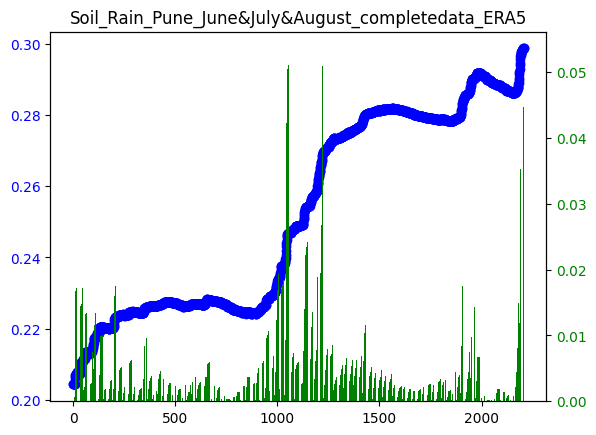

In [ ]:
from sklearn.metrics import r2_score
data = pd.read_csv('/content/New_Average_Pune_soil_rain_2021_complete_6&7&8.csv.csv')
#list=[50,100,150,200,250,300,350]

rain_data_list=data["tp"][:92*24].tolist()
soil_data_list1=data["avg_soil"][:92*24].tolist()
time = np.arange(len(data["time"][:92*24]))
soil_data_list=[]
for i in range (92*24):
  a=soil_data_list1[i]*1000
  soil_data_list.append(a)
soil_data_list=np.array(soil_data_list)
#print(soil_data_list)

fig, ax1 = plt.subplots()
ax1.scatter(time, soil_data_list1, color="blue")
#ax1.set_.ylabel('soil')
ax1.tick_params(axis ='y', labelcolor = "blue")

soil_data_list= np.array(soil_data_list)
rain_data_list= np.array(rain_data_list)
#print(soil_data_list)
#a, b = np.polyfit(soil_data_list, rain_data_list, 1)
#plt.plot(soil_data_list, a*soil_data_list+b, color="red")
ax2 = ax1.twinx()
plt.bar(time, rain_data_list, color="green")
#ax2.set_.xlabel('Days')
#ax2.set_.ylabel('Rain')
ax2.tick_params(axis ='y', labelcolor = "green")

#fig.suptitle('matplotlib.axes.Axes.twinx() \
#function Example\n\n', fontweight ="bold")
plt.title('Soil_Rain_Pune_June&July&August_completedata_ERA5')



#plt.ylabel('Soil_water')

#r2 = r2_score(soil_data_list, rain_data_list)
#print('r2 score for perfect model is', r2)

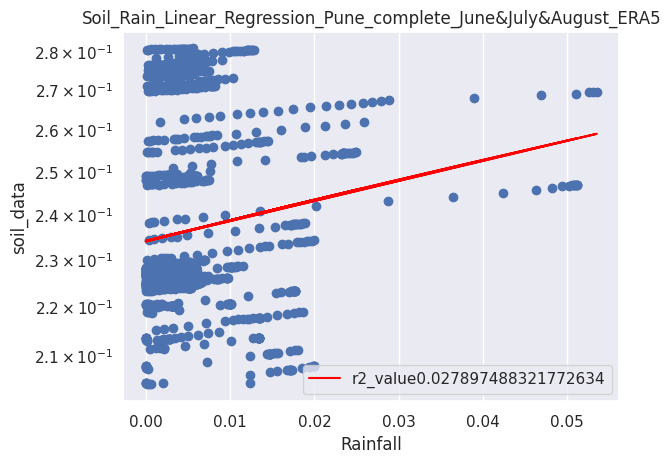

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
from sklearn.metrics import r2_score

data = pd.read_csv('/content/New_Average_Pune_soil_rain_2021_complete_6&7&8.csv.csv')
#list=[50,100,150,200,250,300,350]

rain_data_list=data["tp"][:1464].tolist()
soil_data_list=data["avg_soil"][:1464].tolist()
'''list2=[]
for i in range (720):
  if float(rain_data_list[i])<0.001:
    list2.append(i)
    #del rain_data_list[i]
    #rain_data_list.append()
    #soil_data_list[i]==False
    #soil_data_list.append()
print(list2)
for ele in sorted(list2, reverse = True):
    del rain_data_list[ele]
for ele in sorted(list2, reverse = True):
    del soil_data_list[ele]'''
#for i in range (len(list2)):

   #del rain_data_list[int([list2][i])]
#print(len(rain_data_list))
plt.scatter( rain_data_list, (soil_data_list))
plt.gca().set_yscale('log')
soil_data_list= np.array(soil_data_list)
rain_data_list= np.array(rain_data_list)
#print(soil_data_list)
a, b = np.polyfit( rain_data_list,soil_data_list, 1)
r2 = r2_score( soil_data_list, a*rain_data_list+b )
#y=(((np.e)**(10000*rain_data_list)))
#y=y.tolist()
#print(y)
#print(y)
plt.plot(rain_data_list, a*rain_data_list+b, color="red", label="r2_value"+str(r2))

plt.title('Soil_Rain_Linear_Regression_Pune_complete_June&July&August_ERA5')
plt.xlabel('Rainfall')
plt.ylabel('soil_data')
plt.legend(loc="lower right")
#print('r2 score for perfect model is', r2)

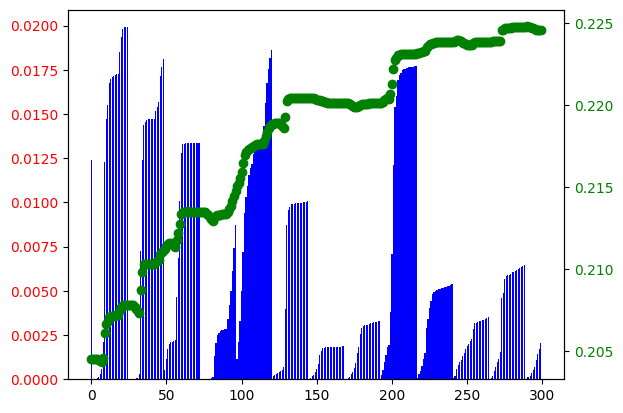

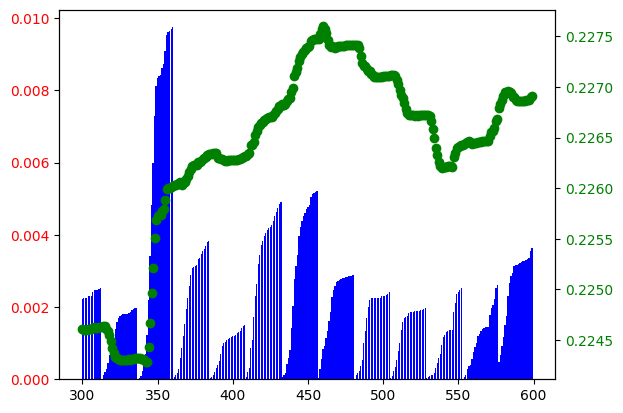

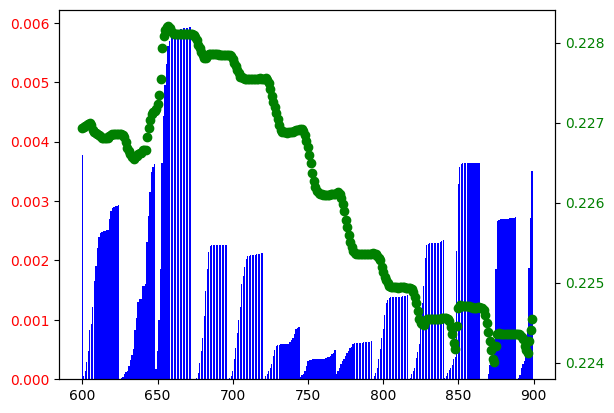

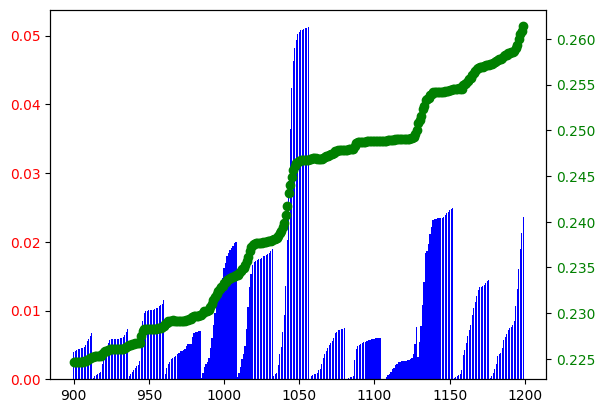

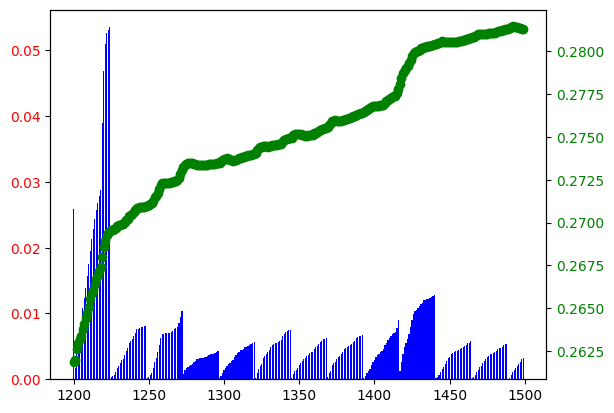

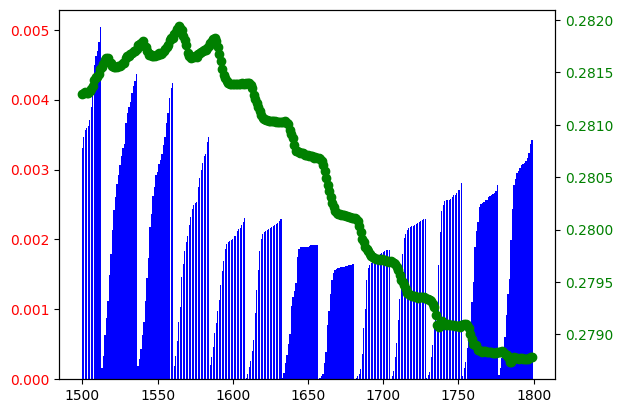

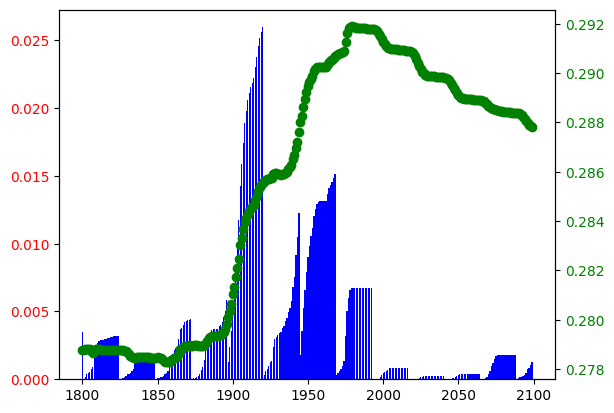

In [ ]:
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
from sklearn.metrics import r2_score
data = pd.read_csv('/content/New_Average_Pune_soil_rain_2021_complete_6&7&8.csv.csv')
#list=[50,100,150,200,250,300,350]

list1=["Jan & Feb", "Mar & Apr", "May & Jun", "Jul & Aug", "Sep & Oct", "Nov & Dec"]
list=[0,100*3,200*3,300*3,400*3,500*3,600*3,700*3]
rain_data_list=data["tp"][:720*3].tolist()
soil_data_list1=data["avg_soil"][:720*3].tolist()
time = np.arange(len(data["time"][:720*3]))
soil_data_list=[]
for i in range (720*3):
  a=soil_data_list1[i]*1000
  soil_data_list.append(a)
soil_data_list=np.array(soil_data_list)
#print(soil_data_list)
rain_data_list= np.array(rain_data_list)
for i in range (len(list)-1):
  fig, ax1 = plt.subplots()
  ax1.bar(time[list[i]:list[i+1]], rain_data_list[list[i]:list[i+1]], color="blue")
  #plt.ylim(0,0.06)
#ax1.set_.ylabel('soil')
  ax1.tick_params(axis ='y', labelcolor = "red")

  #soil_data_list= np.array(soil_data_list)
  #rain_data_list= np.array(rain_data_list)
#print(soil_data_list)
#a, b = np.polyfit(soil_data_list, rain_data_list, 1)
#plt.plot(soil_data_list, a*soil_data_list+b, color="red")
  ax2 = ax1.twinx()

  plt.scatter(time[list[i]:list[i+1]], soil_data_list1[list[i]:list[i+1]], color="green")
  #plt.ylim(0,0.00035)
#ax2.set_.xlabel('Days')
#ax2.set_.ylabel('Rain')
  ax2.tick_params(axis ='y', labelcolor = "green")

RAINFALL: [0.11473859458333333, 0.09928199291666667, 0.08891582458333333, 0.02595101291666667, 0.11243424166666667, 0.06811414708333334, 0.017018015416666667, 0.019961988750000003, 0.11437657041666667, 0.04308059, 0.022714536249999997, 0.04041439166666667, 0.01791658375, 0.013421635416666668, 0.05277336333333334, 0.025641713333333333, 0.010037775416666665, 0.03036814375, 0.031874842083333334, 0.021649718749999998, 0.016637148333333334, 0.014284424166666667, 0.010793287499999998, 0.01186442125, 0.026146745833333335, 0.019987263749999998, 0.012775623333333333, 0.04717778416666667, 0.01620572958333333, 0.01440229375, 0.005601827916666666, 0.003265974166666667, 0.00481901, 0.009901007500000001, 0.014341264583333332, 0.023560530833333333, 0.016475105833333333, 0.029429564999999998, 0.04303221333333333, 0.06971138916666667, 0.04575105375, 0.10736272416666666, 0.12979739083333336, 0.28693684583333334, 0.05812261, 0.041605456250000006, 0.021978014583333337, 0.19084929916666665, 0.0840336833333

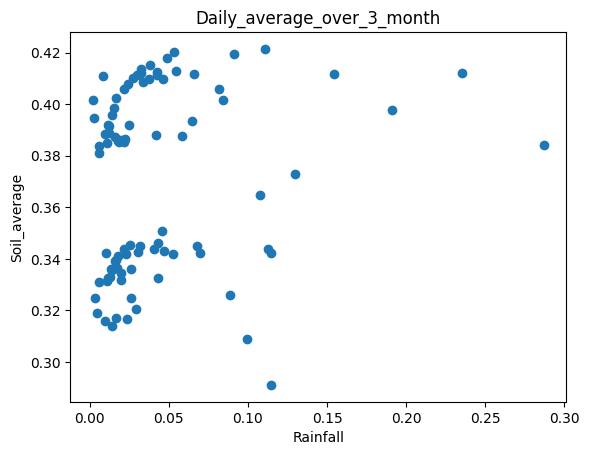

Text(0, 0.5, 'Soil_average_&_rainfall')

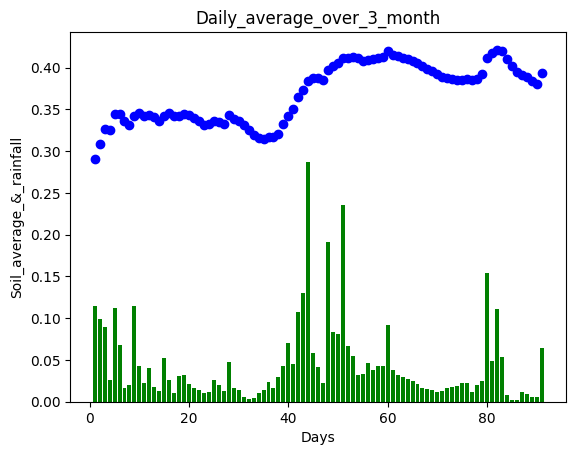

In [ ]:
df=pd.read_csv("/content/New_Average_Pune_soil_rain_2021_complete_6&7&8.csv.csv")

list1=[]
for i in range (92):
  a=24*i
  list1.append(a)
#print(list1)


x=[]
for i in range(91):
  a=i+1
  x.append(a)



rainfall=[]
for i in range (len(list1)-1):
  a=(np.mean((df['tp'][int(list1[i]):int(list1[i+1])])))*10
  #a=df.mean()
  rainfall.append(a)
print("RAINFALL:",rainfall)



soil_1=[]
for i in range (len(list1)-1):
  a=np.mean((df['swvl1'][int(list1[i]):int(list1[i+1])]))
  #a=df.mean()
  soil_1.append(a)
print("SOIL_1:",soil_1)
#print(len(list2))
#print(np.mean(list2))

#plt.scatter(rainfall, soil_1)
#plt.show()
#plt.scatter(x, soil_1, color="green")



soil_2=[]
for i in range (len(list1)-1):
  a=np.mean((df['swvl2'][int(list1[i]):int(list1[i+1])]))
  #a=df.mean()
  soil_2.append(a)
print("SOIL_2:",soil_2)




soil_3=[]
for i in range (len(list1)-1):
  a=np.mean((df['swvl3'][int(list1[i]):int(list1[i+1])]))
  #a=df.mean()
  soil_3.append(a)
print("SOIL_3:",soil_3)





soil_4=[]
for i in range (len(list1)-1):
  a=np.mean((df['swvl4'][int(list1[i]):int(list1[i+1])]))
  #a=df.mean()
  soil_4.append(a)
print("SOIL_4:",soil_4)




soil_avg=[]
for i in range (len(soil_4)):
  a=((soil_1[i]+soil_2[i]+soil_3[i]+soil_4[i])/4)
  soil_avg.append(a)
print(soil_avg)
print(len(soil_avg))
print(len(x))


plt.scatter(rainfall, soil_avg)
plt.title("Daily_average_over_3_month")
plt.xlabel("Rainfall")
plt.ylabel("Soil_average")
plt.show()
plt.scatter(x, soil_avg, color="blue")
plt.bar(x, rainfall, color="green")
plt.title("Daily_average_over_3_month")
plt.xlabel("Days")
plt.ylabel("Soil_average_&_rainfall")


[0.20451430225, 0.20450662175, 0.2044820905, 0.20443239925, 0.204368442, 0.20438359125, 0.20480511150000003, 0.20546023600000002, 0.20641714, 0.20679725975000002, 0.20695948325, 0.20711233925, 0.2071345595, 0.207147765, 0.20715654175, 0.2071672765, 0.20725031425, 0.2073753485, 0.2076087165, 0.207746048, 0.20781198750000002, 0.20782031, 0.2078194685, 0.207818848, 0.20781426675, 0.20780299075000003, 0.2077704075, 0.2076938835, 0.20758430975, 0.207460023, 0.20770582, 0.20828063200000002, 0.20936819075000002, 0.2100502325, 0.21028744, 0.21030572549999998, 0.210318588, 0.21032410024999998, 0.210323912, 0.210322456, 0.210340549, 0.210370679, 0.210441087, 0.2105781655, 0.210733724, 0.21097243999999998, 0.21109375749999998, 0.21121506175, 0.21135093075, 0.21146874725, 0.21153979375, 0.211543037, 0.21150514575, 0.21143625124999998, 0.21148212625, 0.21165953275, 0.2121217405, 0.21264405475, 0.2131007695, 0.21343831975, 0.21349903425, 0.21349985324999998, 0.21350106375, 0.213501959, 0.21349776775

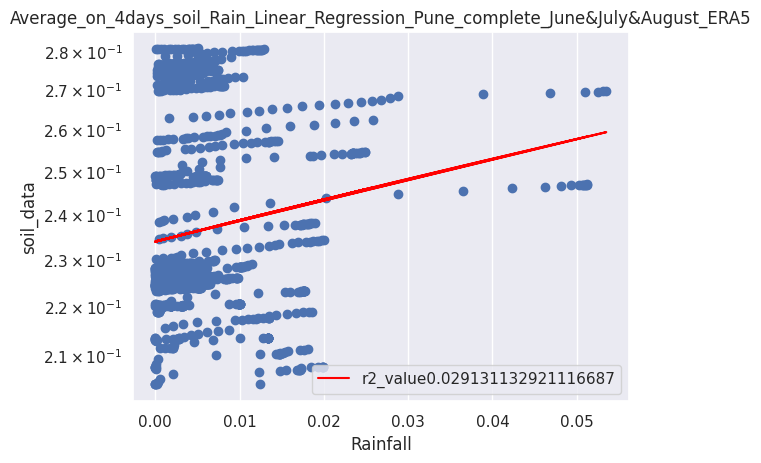

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
from sklearn.metrics import r2_score

data = pd.read_csv('/content/New_Average_Pune_soil_rain_2021_complete_6&7&8.csv.csv')
#list=[50,100,150,200,250,300,350]

rain_data_list=data["tp"][:1461].tolist()
#print(rain_data_list1[2])
soil_data_list1=data["avg_soil"][:1464].tolist()
#a=float(rain_data_list1[3+1])+float(rain_data_list1[5])
#print(a)
'''rain_data_list=[]
for i in range (len(rain_data_list1)-3):
  a=((float(rain_data_list1[i+1])+float(rain_data_list1[i+1])+float(rain_data_list1[i+2]+float(rain_data_list1[i+3])))/4)
 # print(a)
  rain_data_list.append(a)

print(rain_data_list)'''


soil_data_list=[]
for i in range (len(soil_data_list1)-3):
  a=((float(soil_data_list1[i+1])+float(soil_data_list1[i+1])+float(soil_data_list1[i+2]+float(soil_data_list1[i+3])))/4)
 # print(a)
  soil_data_list.append(a)

print(soil_data_list)
print(len(rain_data_list))
print(len(soil_data_list))

'''list2=[]
for i in range (1464):
  if float(rain_data_list[i])>0.02:
    list2.append(i)
    #del rain_data_list[i]
    #rain_data_list.append()
    #soil_data_list[i]==False
    #soil_data_list.append()
print(list2)
for ele in sorted(list2, reverse = True):
    del rain_data_list[ele]
for ele in sorted(list2, reverse = True):
    del soil_data_list[ele]
#for i in range (len(list2)):'''

   #del rain_data_list[int([list2][i])]
#print(len(rain_data_list))
plt.scatter( rain_data_list, (soil_data_list))
plt.gca().set_yscale('log')
soil_data_list= np.array(soil_data_list)
rain_data_list= np.array(rain_data_list)
#print(soil_data_list)
a, b = np.polyfit( rain_data_list,soil_data_list, 1)
r2 = r2_score( soil_data_list, a*rain_data_list+b )
#y=(((np.e)**(10000*rain_data_list)))
#y=y.tolist()
print(y)
#print(y)
plt.plot(rain_data_list, a*rain_data_list+b, color="red", label="r2_value"+str(r2))

plt.title('Average_on_4days_soil_Rain_Linear_Regression_Pune_complete_June&July&August_ERA5')
plt.xlabel('Rainfall')
plt.ylabel('soil_data')
plt.legend(loc="lower right")
#print('r2 score for perfect model is', r2)

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [ ]:
data = pd.read_csv('/content/New_Average_Pune_soil_rain_2021_complete_6&7&8.csv.csv')
data

,Unnamed: 0,time,longitude,latitude,src,tp,swvl1,swvl2,swvl3,swvl4,avg_soil,tp.1
0,0,01-06-2021 00:00,73.8,18.5,0.000332,0.012409,0.374511,0.251392,0.184941,0.320575,0.204513,0.012409
1,1,01-06-2021 01:00,73.8,18.5,0.000330,0.000000,0.371659,0.252339,0.184941,0.320575,0.204513,0.000000
2,2,01-06-2021 02:00,73.8,18.5,0.000267,0.000005,0.369029,0.253193,0.184965,0.320575,0.204516,0.000005
3,3,01-06-2021 03:00,73.8,18.5,0.000076,0.000015,0.366504,0.253941,0.184988,0.320575,0.204515,0.000015
4,4,01-06-2021 04:00,73.8,18.5,0.000021,0.000066,0.363430,0.254490,0.184988,0.320552,0.204479,0.000066
...,...,...,...,...,...,...,...,...,...,...,...,...
2203,2203,31-08-2021 19:00,73.8,18.5,0.000388,0.044439,0.440577,0.435270,0.441524,0.399287,0.298699,0.044439
2204,2204,31-08-2021 20:00,73.8,18.5,0.000388,0.044636,0.438823,0.435270,0.441477,0.399450,0.298737,0.044636
2205,2205,31-08-2021 21:00,73.8,18.5,0.000388,0.044732,0.436380,0.435048,0.441430,0.399602,0.298746,0.044732
2206,2206,31-08-2021 22:00,73.8,18.5,0.000381,0.044742,0.433470,0.434697,0.441360,0.399777,0.298747,0.044742


In [ ]:
x = data.iloc[:,10:12] # 1t for rows and second for columns
x

,avg_soil,tp.1
0,0.204513,0.012409
1,0.204513,0.000000
2,0.204516,0.000005
3,0.204515,0.000015
4,0.204479,0.000066
...,...,...
2203,0.298699,0.044439
2204,0.298737,0.044636
2205,0.298746,0.044732
2206,0.298747,0.044742


In [ ]:
kmeans = KMeans(6)
kmeans.fit(x)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6)

In [ ]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters
print(identified_clusters)


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[4 4 4 ... 0 0 0]


Text(0, 0.5, 'soil_data')

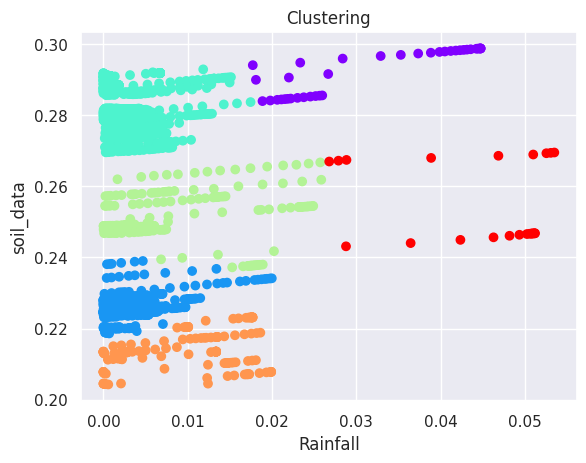

In [ ]:
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = identified_clusters
data_with_clusters.to_csv("new_clusters.csv")
plt.scatter(data_with_clusters['tp'],data_with_clusters['avg_soil'],c=data_with_clusters['Clusters'],cmap='rainbow')
plt.title('Clustering')
plt.xlabel('Rainfall')
plt.ylabel('soil_data')

In [ ]:
df=pd.read_csv("/content/new_clusters.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,time,longitude,latitude,src,tp,swvl1,swvl2,swvl3,swvl4,avg_soil,tp.1,Clusters
0,0,0,01-06-2021 00:00,73.8,18.5,0.000332,0.012409,0.374511,0.251392,0.184941,0.320575,0.204513,0.012409,4
1,1,1,01-06-2021 01:00,73.8,18.5,0.000330,0.000000,0.371659,0.252339,0.184941,0.320575,0.204513,0.000000,4
2,2,2,01-06-2021 02:00,73.8,18.5,0.000267,0.000005,0.369029,0.253193,0.184965,0.320575,0.204516,0.000005,4
3,3,3,01-06-2021 03:00,73.8,18.5,0.000076,0.000015,0.366504,0.253941,0.184988,0.320575,0.204515,0.000015,4
4,4,4,01-06-2021 04:00,73.8,18.5,0.000021,0.000066,0.363430,0.254490,0.184988,0.320552,0.204479,0.000066,4


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

Text(0, 0.5, 'WCSS')

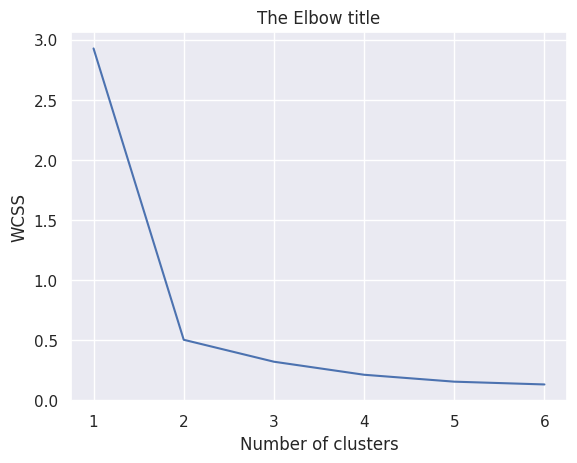

In [ ]:
wcss=[]
for i in range(1,7):
 kmeans = KMeans(i)
 kmeans.fit(x)
 wcss_iter = kmeans.inertia_
 wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [ ]:
list=[1,2,3,4,5]
#data.drop(data.index[(data["grid_1"] == list)],axis=0,inplace=True)
df=(df[df.Clusters.isin(list)==False])
#data = data.drop(labels=list, axis=1)
#data = data[data.grid_1 != 13]
df.head()
df.to_csv("clusters_1.csv")

[7.793578078546729e+53, 1.0, 1.0517968633550032, 1.1641602364321124, 1.9289966552642908, 4.325985605125419, 25.339387415616173, 316.5591145584896, 1144804823.960947, 2.838569054979349e+53, 9.580302247946634e+63, 2.5295938832470284e+67, 6.292908122139978e+72, 4.74451024340072e+73, 1.3028486266416125e+74, 2.512059961740288e+74, 5.636048043746794e+74, 1.086702656289141e+75, 1.2022298315489018e+75, 2.569837225387894e+80, 9.663803245878879e+83, 1.2965177317235858e+86, 2.6293640280339396e+86, 2.765612148994374e+86, 2.765612148994374e+86, 1.0, 1.0, 1.0, 1.1062766417634236, 1.3539144644422882, 1.743683797019738, 2.3607987141986744, 17.792197170823602, 2.840079705751019e+31, 7.409700879213633e+53, 2.2817307009359045e+62, 1.2080882377923838e+63, 4.491241385474206e+63, 8.233071405602947e+63, 1.007663262020527e+64, 1.007663262020527e+64, 1.0598782556644064e+64, 1.0598782556644064e+64, 6.336831976961796e+65, 7.156806503362317e+66, 1.3393222151452424e+68, 3.0740721578454727e+74, 4.7991217501415335e+

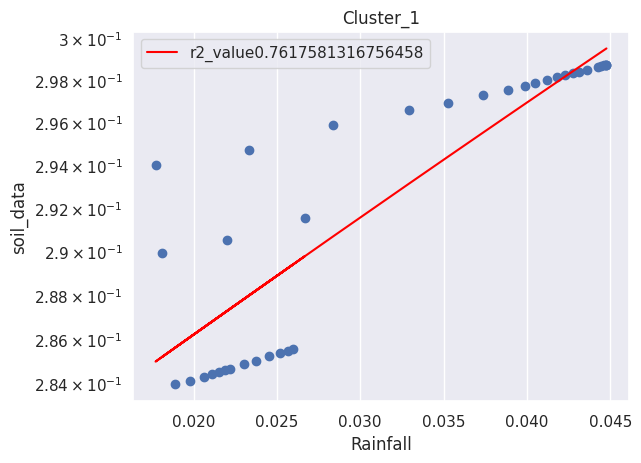

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
from sklearn.metrics import r2_score

data = pd.read_csv('/content/clusters_1.csv')
#list=[50,100,150,200,250,300,350]

rain_data_list=data["tp"][:].tolist()
#print(rain_data_list1[2])
soil_data_list=data["avg_soil"][:].tolist()




plt.scatter( rain_data_list, (soil_data_list))
plt.gca().set_yscale('log')
soil_data_list= np.array(soil_data_list)
rain_data_list= np.array(rain_data_list)
#print(soil_data_list)
a, b = np.polyfit( rain_data_list,soil_data_list, 1)
r2 = r2_score( soil_data_list, a*rain_data_list+b )
#y=(((np.e)**(10000*rain_data_list)))
#y=y.tolist()
print(y)
#print(y)
plt.plot(rain_data_list, a*rain_data_list+b, color="red", label="r2_value"+str(r2))

plt.title('Cluster_1')
plt.xlabel('Rainfall')
plt.ylabel('soil_data')
plt.legend(loc="upper left")

In [ ]:
df=pd.read_csv("/content/new_clusters.csv")
#df.head()
list=[0,2,3,4,5]
#data.drop(data.index[(data["grid_1"] == list)],axis=0,inplace=True)
df=(df[df.Clusters.isin(list)==False])
#data = data.drop(labels=list, axis=1)
#data = data[data.grid_1 != 13]
df.head()
df.to_csv("clusters_2.csv")

[7.793578078546729e+53, 1.0, 1.0517968633550032, 1.1641602364321124, 1.9289966552642908, 4.325985605125419, 25.339387415616173, 316.5591145584896, 1144804823.960947, 2.838569054979349e+53, 9.580302247946634e+63, 2.5295938832470284e+67, 6.292908122139978e+72, 4.74451024340072e+73, 1.3028486266416125e+74, 2.512059961740288e+74, 5.636048043746794e+74, 1.086702656289141e+75, 1.2022298315489018e+75, 2.569837225387894e+80, 9.663803245878879e+83, 1.2965177317235858e+86, 2.6293640280339396e+86, 2.765612148994374e+86, 2.765612148994374e+86, 1.0, 1.0, 1.0, 1.1062766417634236, 1.3539144644422882, 1.743683797019738, 2.3607987141986744, 17.792197170823602, 2.840079705751019e+31, 7.409700879213633e+53, 2.2817307009359045e+62, 1.2080882377923838e+63, 4.491241385474206e+63, 8.233071405602947e+63, 1.007663262020527e+64, 1.007663262020527e+64, 1.0598782556644064e+64, 1.0598782556644064e+64, 6.336831976961796e+65, 7.156806503362317e+66, 1.3393222151452424e+68, 3.0740721578454727e+74, 4.7991217501415335e+

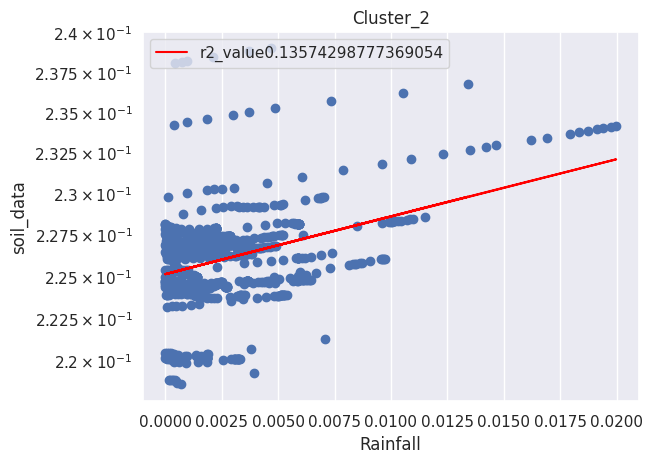

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
from sklearn.metrics import r2_score

data = pd.read_csv('/content/clusters_2.csv')
#list=[50,100,150,200,250,300,350]

rain_data_list=data["tp"][:].tolist()
#print(rain_data_list1[2])
soil_data_list=data["avg_soil"][:].tolist()




plt.scatter( rain_data_list, (soil_data_list))
plt.gca().set_yscale('log')
soil_data_list= np.array(soil_data_list)
rain_data_list= np.array(rain_data_list)
#print(soil_data_list)
a, b = np.polyfit( rain_data_list,soil_data_list, 1)
r2 = r2_score( soil_data_list, a*rain_data_list+b )
#y=(((np.e)**(10000*rain_data_list)))
#y=y.tolist()
print(y)
#print(y)
plt.plot(rain_data_list, a*rain_data_list+b, color="red", label="r2_value"+str(r2))

plt.title('Cluster_2')
plt.xlabel('Rainfall')
plt.ylabel('soil_data')
plt.legend(loc="upper left")

In [ ]:
df=pd.read_csv("/content/new_clusters.csv")
#df.head()
list=[0,1,3,4,5]
#data.drop(data.index[(data["grid_1"] == list)],axis=0,inplace=True)
df=(df[df.Clusters.isin(list)==False])
#data = data.drop(labels=list, axis=1)
#data = data[data.grid_1 != 13]
df.head()
df.to_csv("clusters_3.csv")

[7.793578078546729e+53, 1.0, 1.0517968633550032, 1.1641602364321124, 1.9289966552642908, 4.325985605125419, 25.339387415616173, 316.5591145584896, 1144804823.960947, 2.838569054979349e+53, 9.580302247946634e+63, 2.5295938832470284e+67, 6.292908122139978e+72, 4.74451024340072e+73, 1.3028486266416125e+74, 2.512059961740288e+74, 5.636048043746794e+74, 1.086702656289141e+75, 1.2022298315489018e+75, 2.569837225387894e+80, 9.663803245878879e+83, 1.2965177317235858e+86, 2.6293640280339396e+86, 2.765612148994374e+86, 2.765612148994374e+86, 1.0, 1.0, 1.0, 1.1062766417634236, 1.3539144644422882, 1.743683797019738, 2.3607987141986744, 17.792197170823602, 2.840079705751019e+31, 7.409700879213633e+53, 2.2817307009359045e+62, 1.2080882377923838e+63, 4.491241385474206e+63, 8.233071405602947e+63, 1.007663262020527e+64, 1.007663262020527e+64, 1.0598782556644064e+64, 1.0598782556644064e+64, 6.336831976961796e+65, 7.156806503362317e+66, 1.3393222151452424e+68, 3.0740721578454727e+74, 4.7991217501415335e+

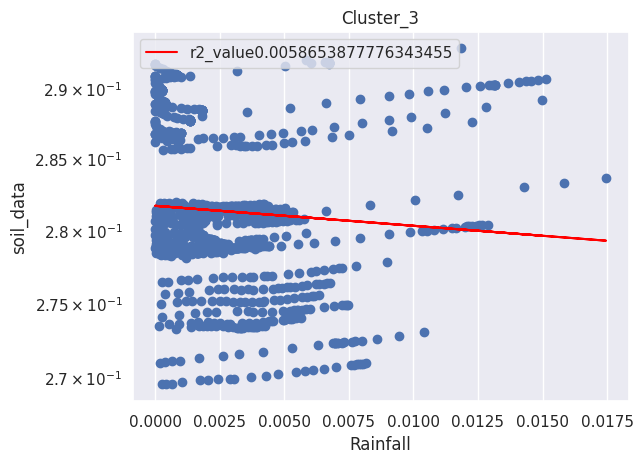

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
from sklearn.metrics import r2_score

data = pd.read_csv('/content/clusters_3.csv')
#list=[50,100,150,200,250,300,350]

rain_data_list=data["tp"][:].tolist()
#print(rain_data_list1[2])
soil_data_list=data["avg_soil"][:].tolist()




plt.scatter( rain_data_list, (soil_data_list))
plt.gca().set_yscale('log')
soil_data_list= np.array(soil_data_list)
rain_data_list= np.array(rain_data_list)
#print(soil_data_list)
a, b = np.polyfit( rain_data_list,soil_data_list, 1)
r2 = r2_score( soil_data_list, a*rain_data_list+b )
#y=(((np.e)**(10000*rain_data_list)))
#y=y.tolist()
print(y)
#print(y)
plt.plot(rain_data_list, a*rain_data_list+b, color="red", label="r2_value"+str(r2))

plt.title('Cluster_3')
plt.xlabel('Rainfall')
plt.ylabel('soil_data')
plt.legend(loc="upper left")

In [ ]:
df=pd.read_csv("/content/new_clusters.csv")
#df.head()
list=[0,1,2,4,5]
#data.drop(data.index[(data["grid_1"] == list)],axis=0,inplace=True)
df=(df[df.Clusters.isin(list)==False])
#data = data.drop(labels=list, axis=1)
#data = data[data.grid_1 != 13]
df.head()
df.to_csv("clusters_4.csv")

[7.793578078546729e+53, 1.0, 1.0517968633550032, 1.1641602364321124, 1.9289966552642908, 4.325985605125419, 25.339387415616173, 316.5591145584896, 1144804823.960947, 2.838569054979349e+53, 9.580302247946634e+63, 2.5295938832470284e+67, 6.292908122139978e+72, 4.74451024340072e+73, 1.3028486266416125e+74, 2.512059961740288e+74, 5.636048043746794e+74, 1.086702656289141e+75, 1.2022298315489018e+75, 2.569837225387894e+80, 9.663803245878879e+83, 1.2965177317235858e+86, 2.6293640280339396e+86, 2.765612148994374e+86, 2.765612148994374e+86, 1.0, 1.0, 1.0, 1.1062766417634236, 1.3539144644422882, 1.743683797019738, 2.3607987141986744, 17.792197170823602, 2.840079705751019e+31, 7.409700879213633e+53, 2.2817307009359045e+62, 1.2080882377923838e+63, 4.491241385474206e+63, 8.233071405602947e+63, 1.007663262020527e+64, 1.007663262020527e+64, 1.0598782556644064e+64, 1.0598782556644064e+64, 6.336831976961796e+65, 7.156806503362317e+66, 1.3393222151452424e+68, 3.0740721578454727e+74, 4.7991217501415335e+

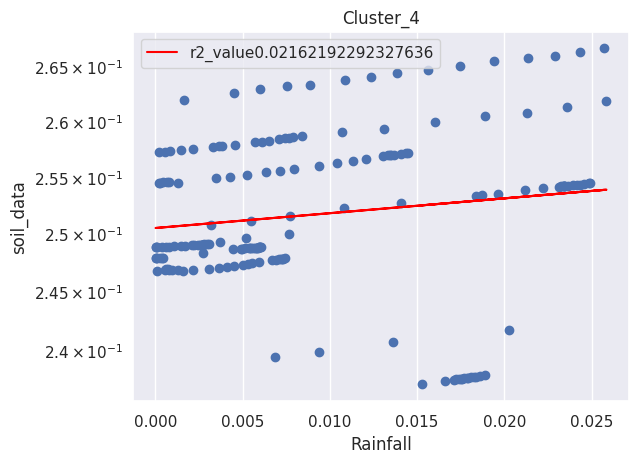

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
from sklearn.metrics import r2_score

data = pd.read_csv('/content/clusters_4.csv')
#list=[50,100,150,200,250,300,350]

rain_data_list=data["tp"][:].tolist()
#print(rain_data_list1[2])
soil_data_list=data["avg_soil"][:].tolist()




plt.scatter( rain_data_list, (soil_data_list))
plt.gca().set_yscale('log')
soil_data_list= np.array(soil_data_list)
rain_data_list= np.array(rain_data_list)
#print(soil_data_list)
a, b = np.polyfit( rain_data_list,soil_data_list, 1)
r2 = r2_score( soil_data_list, a*rain_data_list+b )
#y=(((np.e)**(10000*rain_data_list)))
#y=y.tolist()
print(y)
#print(y)
plt.plot(rain_data_list, a*rain_data_list+b, color="red", label="r2_value"+str(r2))

plt.title('Cluster_4')
plt.xlabel('Rainfall')
plt.ylabel('soil_data')
plt.legend(loc="upper left")

In [ ]:
df=pd.read_csv("/content/new_clusters.csv")
#df.head()
list=[0,1,2,3,5]
#data.drop(data.index[(data["grid_1"] == list)],axis=0,inplace=True)
df=(df[df.Clusters.isin(list)==False])
#data = data.drop(labels=list, axis=1)
#data = data[data.grid_1 != 13]
df.head()
df.to_csv("clusters_5.csv")

[7.793578078546729e+53, 1.0, 1.0517968633550032, 1.1641602364321124, 1.9289966552642908, 4.325985605125419, 25.339387415616173, 316.5591145584896, 1144804823.960947, 2.838569054979349e+53, 9.580302247946634e+63, 2.5295938832470284e+67, 6.292908122139978e+72, 4.74451024340072e+73, 1.3028486266416125e+74, 2.512059961740288e+74, 5.636048043746794e+74, 1.086702656289141e+75, 1.2022298315489018e+75, 2.569837225387894e+80, 9.663803245878879e+83, 1.2965177317235858e+86, 2.6293640280339396e+86, 2.765612148994374e+86, 2.765612148994374e+86, 1.0, 1.0, 1.0, 1.1062766417634236, 1.3539144644422882, 1.743683797019738, 2.3607987141986744, 17.792197170823602, 2.840079705751019e+31, 7.409700879213633e+53, 2.2817307009359045e+62, 1.2080882377923838e+63, 4.491241385474206e+63, 8.233071405602947e+63, 1.007663262020527e+64, 1.007663262020527e+64, 1.0598782556644064e+64, 1.0598782556644064e+64, 6.336831976961796e+65, 7.156806503362317e+66, 1.3393222151452424e+68, 3.0740721578454727e+74, 4.7991217501415335e+

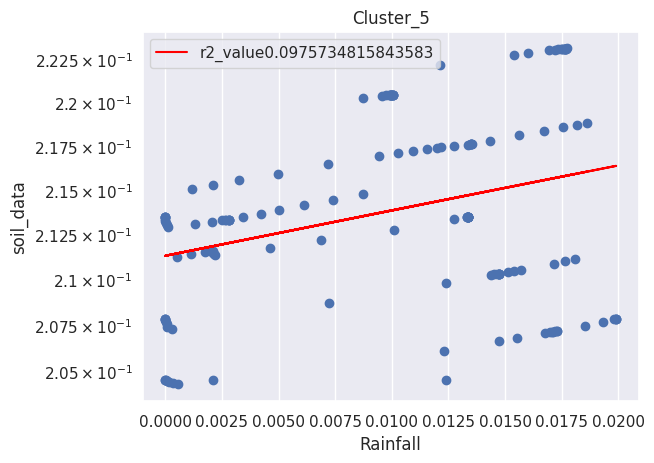

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
from sklearn.metrics import r2_score

data = pd.read_csv('/content/clusters_5.csv')
#list=[50,100,150,200,250,300,350]

rain_data_list=data["tp"][:].tolist()
#print(rain_data_list1[2])
soil_data_list=data["avg_soil"][:].tolist()




plt.scatter( rain_data_list, (soil_data_list))
plt.gca().set_yscale('log')
soil_data_list= np.array(soil_data_list)
rain_data_list= np.array(rain_data_list)
#print(soil_data_list)
a, b = np.polyfit( rain_data_list,soil_data_list, 1)
r2 = r2_score( soil_data_list, a*rain_data_list+b )
#y=(((np.e)**(10000*rain_data_list)))
#y=y.tolist()
print(y)
#print(y)
plt.plot(rain_data_list, a*rain_data_list+b, color="red", label="r2_value"+str(r2))

plt.title('Cluster_5')
plt.xlabel('Rainfall')
plt.ylabel('soil_data')
plt.legend(loc="upper left")

In [ ]:
df=pd.read_csv("/content/new_clusters.csv")
#df.head()
list=[0,1,2,3,4]
#data.drop(data.index[(data["grid_1"] == list)],axis=0,inplace=True)
df=(df[df.Clusters.isin(list)==False])
#data = data.drop(labels=list, axis=1)
#data = data[data.grid_1 != 13]
df.head()
df.to_csv("clusters_6.csv")

[7.793578078546729e+53, 1.0, 1.0517968633550032, 1.1641602364321124, 1.9289966552642908, 4.325985605125419, 25.339387415616173, 316.5591145584896, 1144804823.960947, 2.838569054979349e+53, 9.580302247946634e+63, 2.5295938832470284e+67, 6.292908122139978e+72, 4.74451024340072e+73, 1.3028486266416125e+74, 2.512059961740288e+74, 5.636048043746794e+74, 1.086702656289141e+75, 1.2022298315489018e+75, 2.569837225387894e+80, 9.663803245878879e+83, 1.2965177317235858e+86, 2.6293640280339396e+86, 2.765612148994374e+86, 2.765612148994374e+86, 1.0, 1.0, 1.0, 1.1062766417634236, 1.3539144644422882, 1.743683797019738, 2.3607987141986744, 17.792197170823602, 2.840079705751019e+31, 7.409700879213633e+53, 2.2817307009359045e+62, 1.2080882377923838e+63, 4.491241385474206e+63, 8.233071405602947e+63, 1.007663262020527e+64, 1.007663262020527e+64, 1.0598782556644064e+64, 1.0598782556644064e+64, 6.336831976961796e+65, 7.156806503362317e+66, 1.3393222151452424e+68, 3.0740721578454727e+74, 4.7991217501415335e+

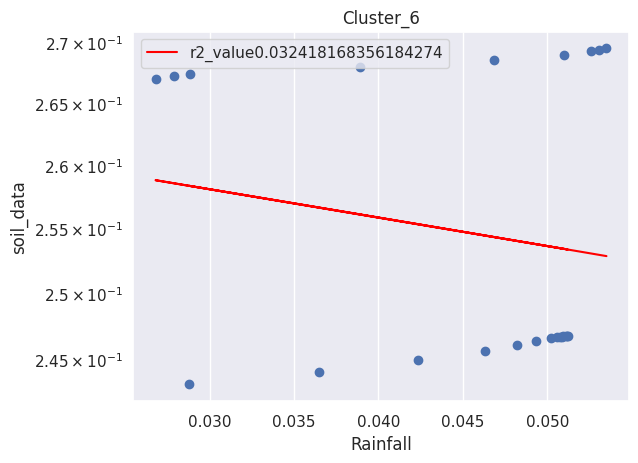

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
from sklearn.metrics import r2_score

data = pd.read_csv('/content/clusters_6.csv')
#list=[50,100,150,200,250,300,350]

rain_data_list=data["tp"][:].tolist()
#print(rain_data_list1[2])
soil_data_list=data["avg_soil"][:].tolist()




plt.scatter( rain_data_list, (soil_data_list))
plt.gca().set_yscale('log')
soil_data_list= np.array(soil_data_list)
rain_data_list= np.array(rain_data_list)
#print(soil_data_list)
a, b = np.polyfit( rain_data_list,soil_data_list, 1)
r2 = r2_score( soil_data_list, a*rain_data_list+b )
#y=(((np.e)**(10000*rain_data_list)))
#y=y.tolist()
print(y)
#print(y)
plt.plot(rain_data_list, a*rain_data_list+b, color="red", label="r2_value"+str(r2))

plt.title('Cluster_6')
plt.xlabel('Rainfall')
plt.ylabel('soil_data')
plt.legend(loc="upper left")